<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


*   Identify the distribution of data in the dataset.

*   Identify outliers in the dataset.

*   Remove outliers from the dataset.

*   Identify correlation between features in the dataset.


***


## Hands on Lab


Import the pandas module.


In [1]:
import pandas as pd

Load the dataset into a dataframe.


In [34]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

In [59]:
df.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
1,9,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,New Zealand,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,NaN,23.0,Man,No,Bisexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
2,13,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,Somewhat more welcome now than last year,Tech articles written by other developers;Cour...,28.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Appropriate in length,Easy
3,16,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,United Kingdom,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,26.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
4,17,I am a developer by profession,Yes,Less than once a month but more than once per ...,The quality of OSS and closed source software ...,Employed full-time,Australia,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,29.0,Man,No,Straight / Heterosexual,Hispanic or Latino/Latina;Multiracial,No,Appropriate in length,Easy


## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


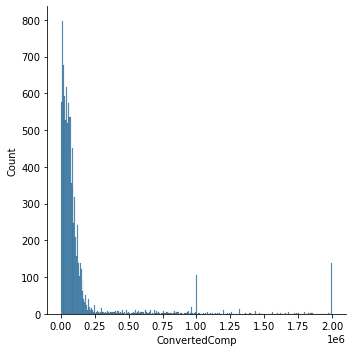

In [5]:
import seaborn as sns

sns.displot(df, x="ConvertedComp")

Plot the histogram for the column `ConvertedComp`.


<AxesSubplot:xlabel='ConvertedComp', ylabel='Count'>

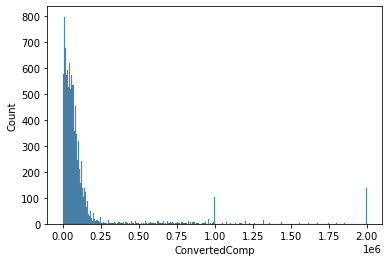

In [8]:
sns.histplot(data=df, x="ConvertedComp")

What is the median of the column `ConvertedComp`?


In [9]:
df['ConvertedComp'].median()


57745.0

How many responders identified themselves only as a **Man**?


In [36]:
df['Gender'].value_counts()['Man']


10480

Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [79]:
df.loc[df['Gender'] == 'Woman', 'ConvertedComp'].median()



57708.0

Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [29]:
print("Age min:", df['Age'].min())
print("Age q1:", df['Age'].quantile(0.25))
print("Age median:", df['Age'].median())
print("Age q3:", df['Age'].quantile(0.75))
print("Age max:", df['Age'].max())


Age min: 16.0
Age q1: 25.0
Age median: 29.0
Age q3: 35.0
Age max: 99.0


Plot a histogram of the column `Age`.


<AxesSubplot:xlabel='Age', ylabel='Count'>

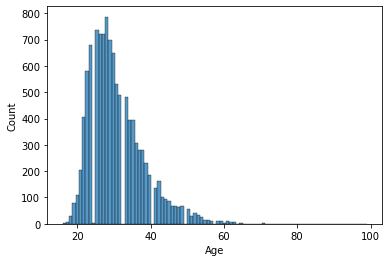

In [30]:
sns.histplot(data=df, x="Age")

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


<AxesSubplot:xlabel='ConvertedComp'>

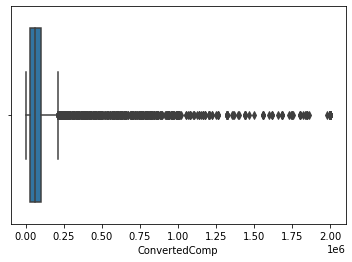

In [41]:
sns.boxplot(data=df, x="ConvertedComp", y="")


Find out the Inter Quartile Range for the column `ConvertedComp`.


In [44]:
Q3 = df['ConvertedComp'].quantile(0.75)
Q1 = df['ConvertedComp'].quantile(0.25)
IQR = Q3 - Q1
IQR

73132.0

Find out the upper and lower bounds.


In [47]:
lower = Q1 - IQR * 1.5
upper = Q3 + IQR * 1.5
print("Upper bound", upper)
print("Lower bound", lower)

Upper bound 209698.0
Lower bound -82830.0


Identify how many outliers are there in the `ConvertedComp` column.


In [48]:
df[(df['ConvertedComp'] < lower) | (df['ConvertedComp'] > upper)].ConvertedComp.count()


879

Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [83]:
df_outliers = df[(df['ConvertedComp'] < lower) | (df['ConvertedComp'] > upper)]

df_minus_outliers = pd.concat([df, df_outliers]).drop_duplicates(keep=False)

df_minus_outliers
df_minus_outliers['ConvertedComp'].mean()

59883.20838915799

## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [78]:
import numpy as np

columns = df.select_dtypes([np.number]).columns.sort_values()
df[columns].corr()

,Age,CodeRevHrs,CompTotal,ConvertedComp,Respondent,WorkWeekHrs
Age,1.000000,-0.020469,0.006970,0.105386,0.004041,0.036518
CodeRevHrs,-0.020469,1.000000,0.007063,-0.033865,0.004621,0.026517
CompTotal,0.006970,0.007063,1.000000,0.001037,-0.013490,0.003510
ConvertedComp,0.105386,-0.033865,0.001037,1.000000,0.002181,0.021143
Respondent,0.004041,0.004621,-0.013490,0.002181,1.000000,-0.015314
WorkWeekHrs,0.036518,0.026517,0.003510,0.021143,-0.015314,1.000000


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2022-01-01&cm_mmc=Email_Newsletter-\_-Developer_Ed%2BTech-\_-WW_WW-\_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
